<a href="https://colab.research.google.com/github/msalmankhan03/Object-Detection/blob/main/Mask_detection_using_Yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ----------------------------
# Cell 1 — Install dependencies
# ----------------------------
!pip install -q ultralytics roboflow opencv-python-headless

# ----------------------------
# Cell 2 — Imports & config
# ----------------------------
import os
from pathlib import Path
from ultralytics import YOLO

# ----------------------------
# CONFIG
# ----------------------------
ROBoflow_API_KEY = "rf_FiL0Vr4wmlMJdiL8n9xTSuBuuJE3"  # Replace with your Roboflow API key
WORK_DIR = "/content/roboflow_dataset"
IMG_SIZE = 640
BATCH = 8
EPOCHS = 50
MODEL_CHECKPOINT = "yolov8s.pt"   # small model for testing
os.makedirs(WORK_DIR, exist_ok=True)

# ----------------------------
# Cell 3 — Download dataset from Roboflow
# ----------------------------
from roboflow import Roboflow

rf = Roboflow(api_key=ROBoflow_API_KEY)
project = rf.workspace("salmanworkspace").project("mask-detection-okykz")
dataset = project.version(6).download("yolov8")  # YOLOv8 format

print("Dataset downloaded to:", dataset.location)

# ----------------------------
# Cell 4 — Check dataset structure
# ----------------------------
!ls -R {dataset.location}

# ----------------------------
# Cell 5 — Create data.yaml automatically
# ----------------------------
import yaml

def create_data_yaml(dataset_path, yaml_path=None):
    dataset_path = Path(dataset_path)
    yaml_path = yaml_path or dataset_path / "data.yaml"
    class_ids = set()
    for f in (dataset_path / "train" / "labels").glob("*.txt"):
        with open(f) as ff:
            for line in ff:
                parts = line.strip().split()
                if parts:
                    class_ids.add(int(parts[0]))
    nc = max(class_ids) + 1
    names = [f"class{i}" for i in range(nc)]
    d = {
        "train": str(dataset_path / "train" / "images"),
        "val": str(dataset_path / "valid" / "images"),
        "test": str(dataset_path / "test" / "images"),
        "nc": nc,
        "names": names
    }
    with open(yaml_path, "w") as f:
        yaml.safe_dump(d, f)
    print("data.yaml written at:", yaml_path)
    return str(yaml_path)

data_yaml_path = create_data_yaml(dataset.location)

# ----------------------------
# Cell 6 — Train YOLOv8
# ----------------------------
model = YOLO(MODEL_CHECKPOINT)

model.train(
    data=data_yaml_path,
    epochs=EPOCHS,
    imgsz=IMG_SIZE,
    batch=BATCH,
    project="/content/yolo_train",
    name="custom_roboflow_train",
    augment=True,
    patience=20
)

# ----------------------------
# Cell 7 — Evaluate model on test set
# ----------------------------
results = model.val()
print(results)

# ----------------------------
# Cell 8 — Inference on new images
# ----------------------------
import cv2
from matplotlib import pyplot as plt

# pick a test image
test_img = str(dataset.location / "test" / "images" / sorted(os.listdir(dataset.location + "/test/images"))[0])

preds = model.predict(test_img, imgsz=IMG_SIZE, conf=0.5)
# Convert to OpenCV image and show
img = cv2.imread(test_img)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 70.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


RuntimeError: {
    "error": {
        "message": "This API key does not exist (or has been revoked).",
        "status": 401,
        "type": "OAuthException",
        "hint": "You may retrieve your API key via the Roboflow Dashboard. Go to Account > Roboflow Keys to retrieve yours.",
        "key": "rf_FiL0Vr4wmlMJdiL8n9xTSuBuuJE3"
    }
}

In [4]:
# ----------------------------
# Cell 2 — Imports & config
# ----------------------------
import os
from pathlib import Path
from ultralytics import YOLO

# ----------------------------
# CONFIG
# ----------------------------
ROBoflow_API_KEY = "UVynpeaBPWtSeiT7QTXx"  # Replace with your Roboflow API key
WORK_DIR = "/content/roboflow_dataset"
IMG_SIZE = 640
BATCH = 8
EPOCHS = 50
MODEL_CHECKPOINT = "yolov8s.pt"   # small model for testing
os.makedirs(WORK_DIR, exist_ok=True)

# ----------------------------
# Cell 3 — Download dataset from Roboflow
# ----------------------------
from roboflow import Roboflow

rf = Roboflow(api_key=ROBoflow_API_KEY)
project = rf.workspace("salmanworkspace").project("mask-detection-okykz")
dataset = project.version(1).download("yolov8")  # YOLOv8 format

print("Dataset downloaded to:", dataset.location)

# ----------------------------
# Cell 4 — Check dataset structure
# ----------------------------
!ls -R {dataset.location}

# ----------------------------
# Cell 5 — Create data.yaml automatically
# ----------------------------
import yaml

def create_data_yaml(dataset_path, yaml_path=None):
    dataset_path = Path(dataset_path)
    yaml_path = yaml_path or dataset_path / "data.yaml"
    class_ids = set()
    for f in (dataset_path / "train" / "labels").glob("*.txt"):
        with open(f) as ff:
            for line in ff:
                parts = line.strip().split()
                if parts:
                    class_ids.add(int(parts[0]))
    nc = max(class_ids) + 1
    names = [f"class{i}" for i in range(nc)]
    d = {
        "train": str(dataset_path / "train" / "images"),
        "val": str(dataset_path / "valid" / "images"),
        "test": str(dataset_path / "test" / "images"),
        "nc": nc,
        "names": names
    }
    with open(yaml_path, "w") as f:
        yaml.safe_dump(d, f)
    print("data.yaml written at:", yaml_path)
    return str(yaml_path)

data_yaml_path = create_data_yaml(dataset.location)

# ----------------------------
# Cell 6 — Train YOLOv8
# ----------------------------
model = YOLO(MODEL_CHECKPOINT)

model.train(
    data=data_yaml_path,
    epochs=EPOCHS,
    imgsz=IMG_SIZE,
    batch=BATCH,
    project="/content/yolo_train",
    name="custom_roboflow_train",
    augment=True,
    patience=20
)

# ----------------------------
# Cell 7 — Evaluate model on test set
# ----------------------------
results = model.val()
print(results)

# ----------------------------
# Cell 8 — Inference on new images
# ----------------------------
import cv2
from matplotlib import pyplot as plt

# pick a test image
test_img = str(dataset.location / "test" / "images" / sorted(os.listdir(dataset.location + "/test/images"))[0])

preds = model.predict(test_img, imgsz=IMG_SIZE, conf=0.5)
# Convert to OpenCV image and show
img = cv2.imread(test_img)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to Mask-detection-1 in yolov8:: 100%|██████████| 56/56 [00:00<00:00, 7172.60it/s]


Dataset downloaded to: /content/Mask-detection-1
/content/Mask-detection-1:
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid

/content/Mask-detection-1/test:
images	labels

/content/Mask-detection-1/test/images:
download-11-_jpeg.rf.e93b91bb73a9000f40beb1eb028a6637.jpg
download-2-_jpeg.rf.09b00ce85d266b29392b639574783dce.jpg

/content/Mask-detection-1/test/labels:
download-11-_jpeg.rf.e93b91bb73a9000f40beb1eb028a6637.txt
download-2-_jpeg.rf.09b00ce85d266b29392b639574783dce.txt

/content/Mask-detection-1/train:
images	labels

/content/Mask-detection-1/train/images:
download-10-_jpeg.rf.aa6ab5007349e849e6ba33341b8cc1b3.jpg
download-12-_jpeg.rf.57c5fe4ec18ed6c8b5c426d1be0f563f.jpg
download-1-_jpeg.rf.9fe4e873c3d344894aa563a53266ce57.jpg
download-3-_jpeg.rf.1a4dc56a001946fd4c4723d0408a3b30.jpg
download-4-_jpeg.rf.c3f58959622e28826a94de95c56a216f.jpg
download-9-_jpeg.rf.e07ae055c8f53b0e8f821130069ed5a8.jpg
download_jpeg.rf.7442aef9821e8e78e7f522561137da07.jpg
images-1-

TypeError: unsupported operand type(s) for /: 'str' and 'str'


image 1/1 /content/salman.jpg: 640x544 1 class2, 78.5ms
Speed: 5.3ms preprocess, 78.5ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 544)


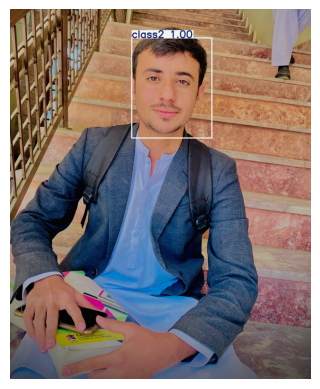

In [5]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

# Load trained model (replace with your trained weights path)
model = YOLO("/content/yolo_train/custom_roboflow_train/weights/best.pt")

# Path to a test image
test_img = "/content/salman.jpg"

# Run prediction
results = model.predict(source=test_img, imgsz=640, conf=0.5)

# Show the predicted image with bounding boxes
pred_img_path = results[0].plot()  # OpenCV image with boxes
plt.imshow(cv2.cvtColor(pred_img_path, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



image 1/1 /content/download (2).jpeg: 640x640 1 class0, 17.4ms
Speed: 4.5ms preprocess, 17.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


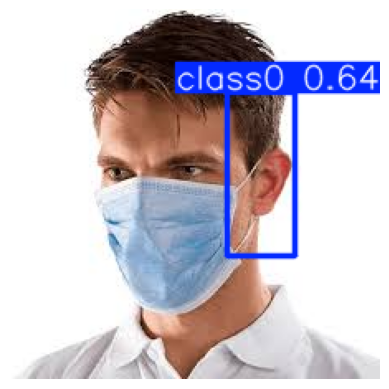

In [6]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

# Load trained model (replace with your trained weights path)
model = YOLO("/content/yolo_train/custom_roboflow_train/weights/best.pt")

# Path to a test image
test_img = "/content/download (2).jpeg"

# Run prediction
results = model.predict(source=test_img, imgsz=640, conf=0.5)

# Show the predicted image with bounding boxes
pred_img_path = results[0].plot()  # OpenCV image with boxes
plt.imshow(cv2.cvtColor(pred_img_path, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



image 1/1 /content/download (5).jpeg: 640x448 (no detections), 72.7ms
Speed: 1.7ms preprocess, 72.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


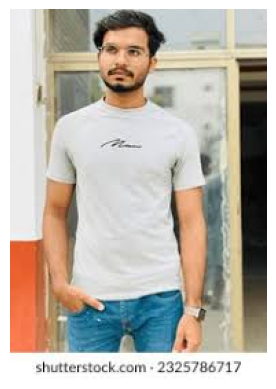

In [7]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

# Load trained model (replace with your trained weights path)
model = YOLO("/content/yolo_train/custom_roboflow_train/weights/best.pt")

# Path to a test image
test_img = "/content/download (5).jpeg"

# Run prediction
results = model.predict(source=test_img, imgsz=640, conf=0.5)

# Show the predicted image with bounding boxes
pred_img_path = results[0].plot()  # OpenCV image with boxes
plt.imshow(cv2.cvtColor(pred_img_path, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



image 1/1 /content/download (6).jpeg: 640x384 1 class1, 97.1ms
Speed: 3.0ms preprocess, 97.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 384)


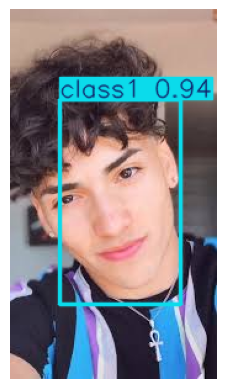

In [8]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

# Load trained model (replace with your trained weights path)
model = YOLO("/content/yolo_train/custom_roboflow_train/weights/best.pt")

# Path to a test image
test_img = "/content/download (6).jpeg"

# Run prediction
results = model.predict(source=test_img, imgsz=640, conf=0.5)

# Show the predicted image with bounding boxes
pred_img_path = results[0].plot()  # OpenCV image with boxes
plt.imshow(cv2.cvtColor(pred_img_path, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
